In [18]:
%pylab inline 
import plot_is
import yt
yt.funcs.mylog.setLevel(50)

Populating the interactive namespace from numpy and matplotlib


# With gravity,$\xi$=6.451 (F.C. case) ,$\rho_c/\rho_0$=14.038

Should collapse and form a core at ~ 5 tff

Inside ramses3/ 

In [25]:
cd /project/projectdirs/astro250/doris/ramses3/trunk/ramses/bin

/global/project/projectdirs/astro250/doris/ramses3/trunk/ramses/bin


$\rho_{out}$ =  1.9988523e-9

$P_{out}$ =  0.00257557593229

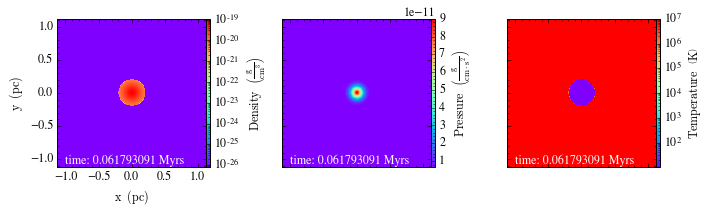

In [7]:
plot_is.check_IC_profiles()


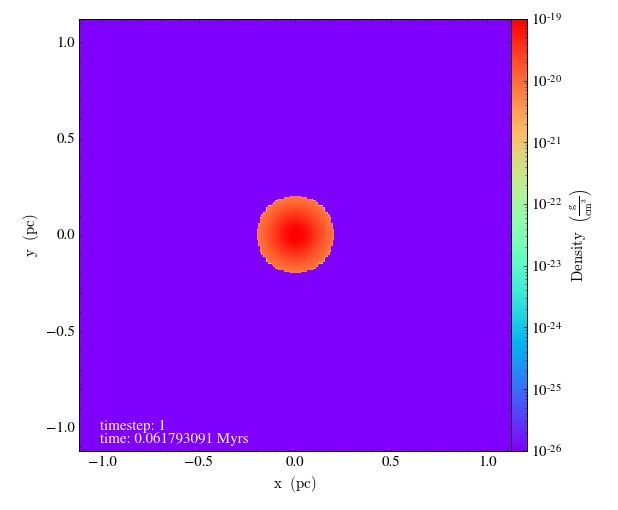


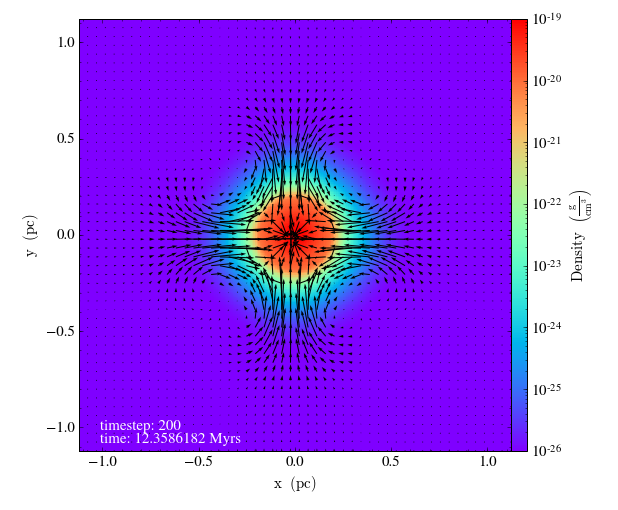


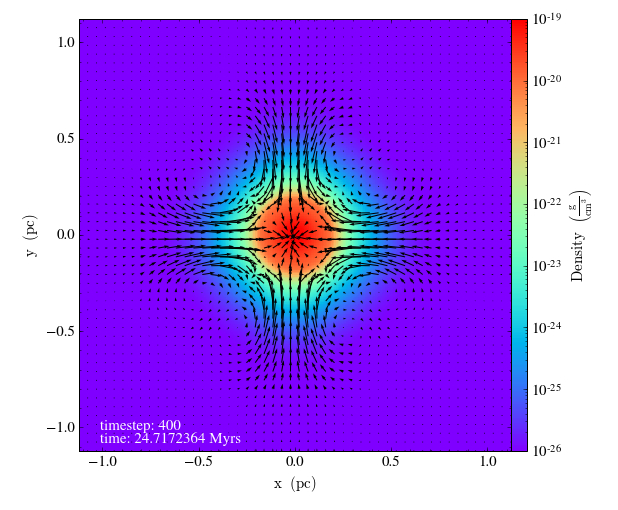


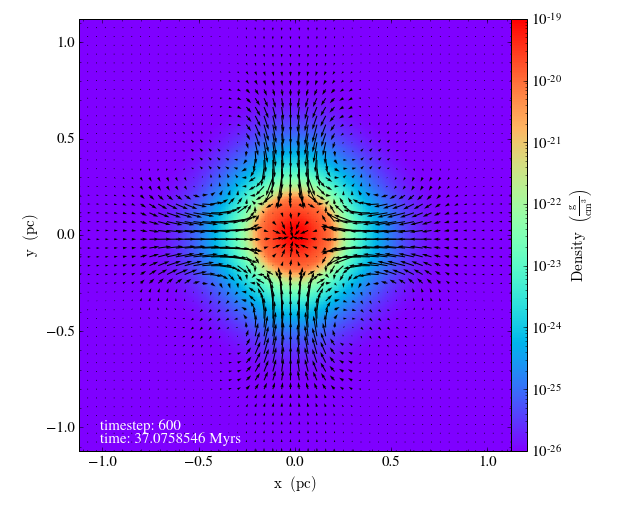


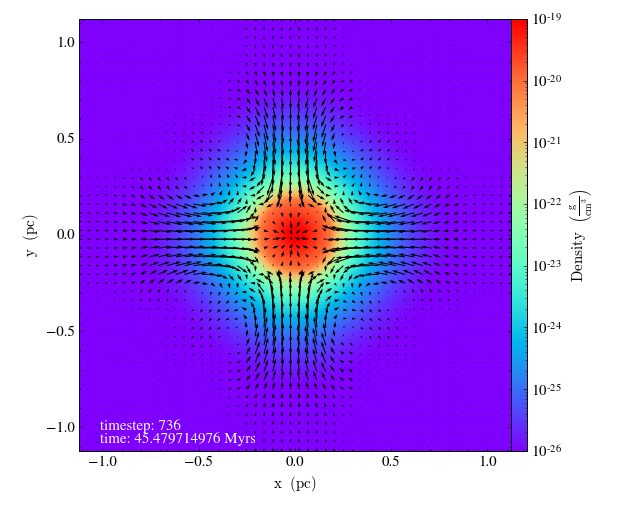

In [27]:
for i in np.arange(1,738):
    if i%200==0 or i==1 or i==736:
        plot_is.plot_time_slice("density",i,plot_size=6,zmin=1e-26,zmax=1e-19)

# With gravity, Marginally stable case $\xi =6.470001$

Inside ramses4/ 

In [28]:
cd /project/projectdirs/astro250/doris/ramses4/trunk/ramses/bin

/global/project/projectdirs/astro250/doris/ramses4/trunk/ramses/bin


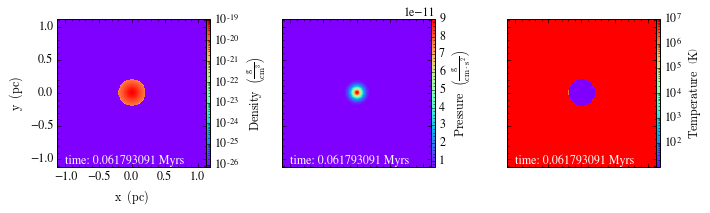

In [32]:
plot_is.check_IC_profiles()


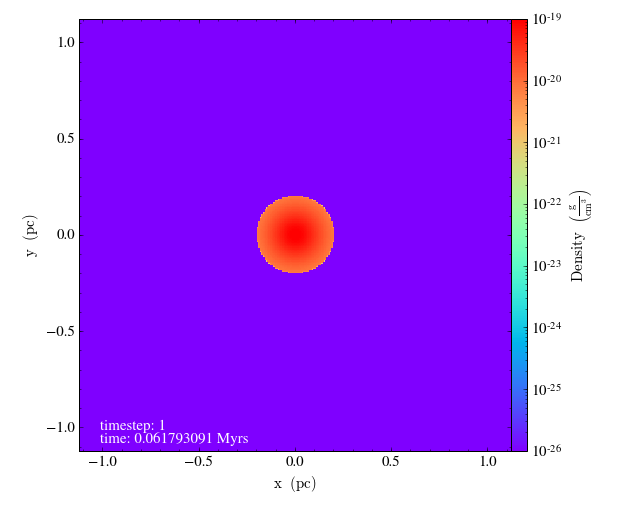


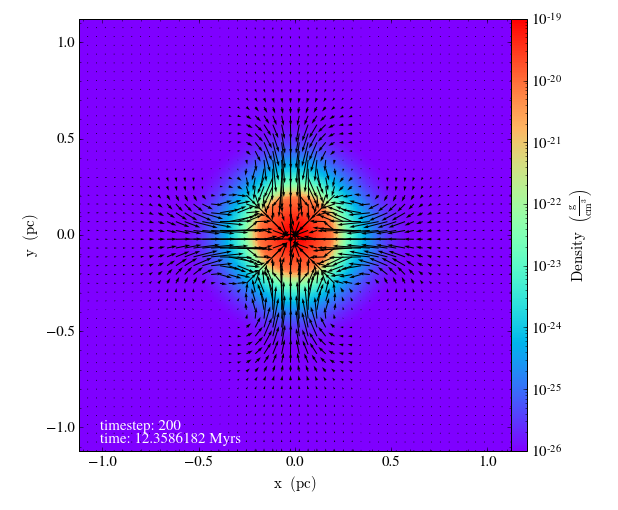


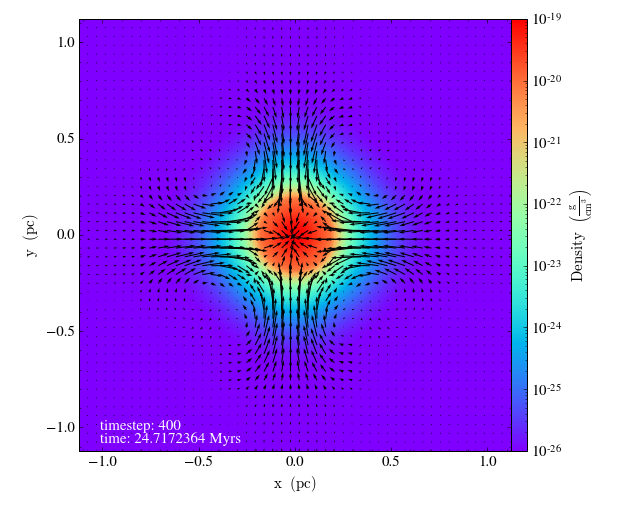


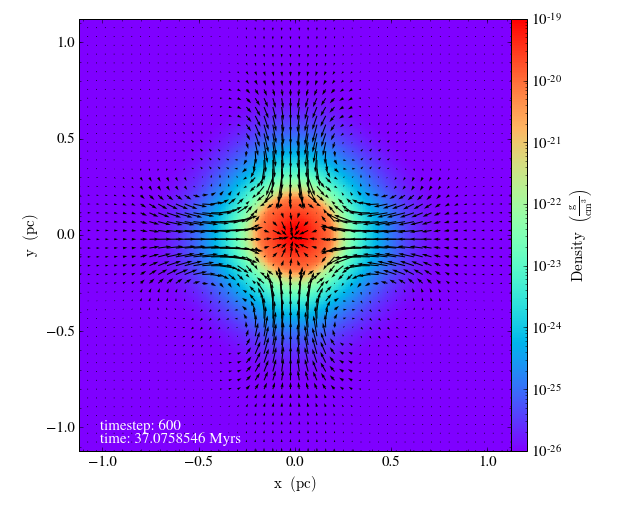


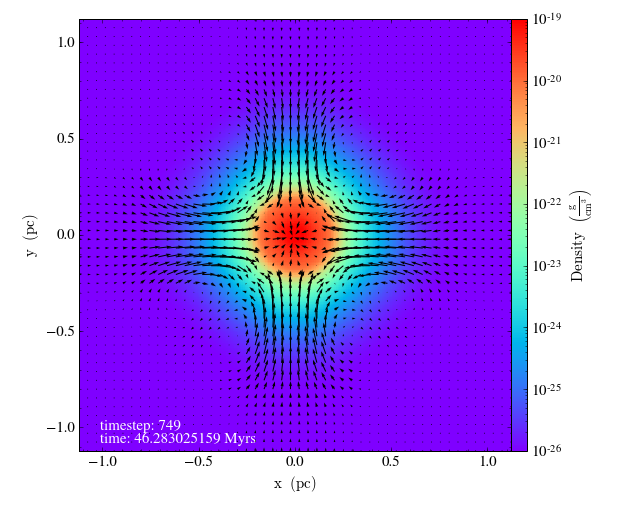

In [29]:
for i in np.arange(1,750):
    if i%200==0 or i==1 or i==749:
        plot_is.plot_time_slice("density",i,plot_size=6,zmin=1e-26,zmax=1e-19)

Setting up a unstable case just to check that things actually collapses

# Slightly above $\xi =7.450001$ ,$\rho_c/\rho_0$=20(Unstable Case)

Inside ramses5/ 

In [30]:
cd /project/projectdirs/astro250/doris/ramses5/trunk/ramses/bin

/global/project/projectdirs/astro250/doris/ramses5/trunk/ramses/bin


In [7]:
from scipy import integrate
def solvr(Y, t):
    return [Y[1], exp(-Y[0])-2/t*Y[1]]
rho_c = 0.02806
scale_d = 3.92e-18
xi_max=20
rho_rat  = 20
xi = np.arange(1e-6, xi_max, 0.01) #start at small poisitive number to avoid div-by-0
asol = integrate.odeint(solvr, [0, 0], xi)
rho = rho_c*np.exp(-asol[:,0]) #rho/rho_c
idx = np.where(rho_c/rho>rho_rat)[0][0]
print "density contrast of ",rho_rat ,"happens at xi = ",xi[idx]

density contrast of  20 happens at xi =  7.450001


In [11]:
rho = np.loadtxt("../patch/hydro/isothermal_sphere/density.txt")
rho_c = 0.02806
scale_d = 3.92e-18
idx = np.where(1/rho>14.1)[0][0]
rho_min = rho[idx]*rho_c*scale_d
print rho_min

7.77664739205e-21


In [12]:
T_in = 10#K
k = 1.38e-16 #cgs
mp = 1.6726219e-24 #grams
scale_p =  2.51e-9 
P_out = (rho_min*k*T_in/mp)/scale_p 
P_out2 = rho_min*3.2870596565353414e+17
print P_out==P_out2
print "Pressure at edge of cloud : ",P_out*scale_p , "cgs"
print "Pressure at edge of cloud: ", P_out , "code units"
T_out = 1e7#K
rho_out = ((P_out*scale_p)*mp/k/T_out)/scale_d
rho_out2 = P_out *7.760797413856846e-07
print rho_out ==rho_out2
print "Denisty outside the cloud: " , rho_out*scale_d,"cgs"
print "Denisty outside the cloud: ", rho_out , "code units"

True
Pressure at edge of cloud :  6.41613828028e-12 cgs
Pressure at edge of cloud:  0.00255623039055 code units
True
Denisty outside the cloud:  7.77664739205e-27 cgs
Denisty outside the cloud:  1.98383862042e-09 code units


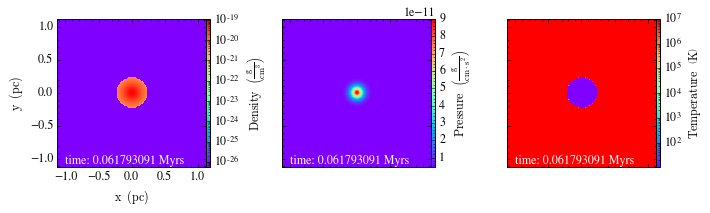

In [18]:
plot_is.check_IC_profiles()


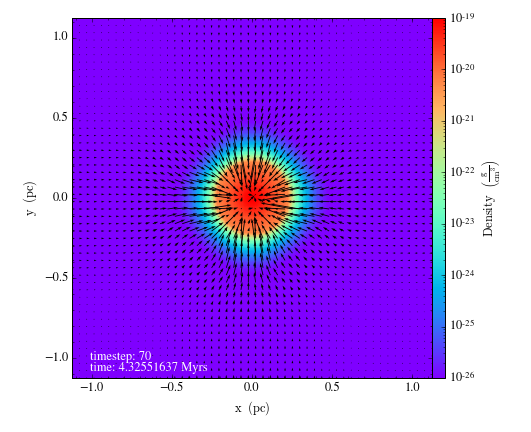


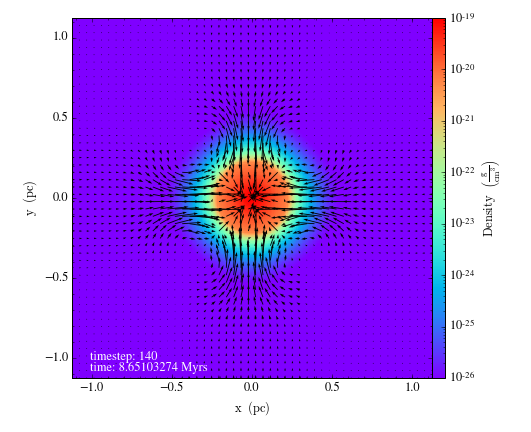


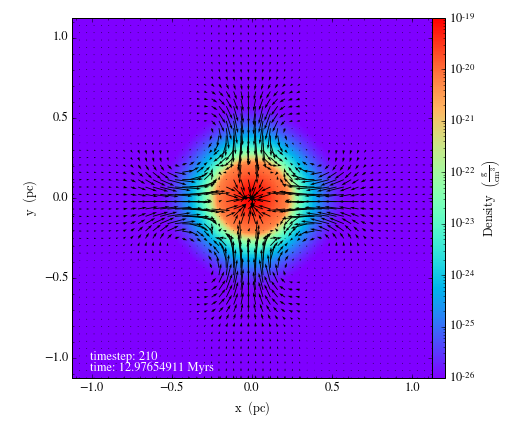


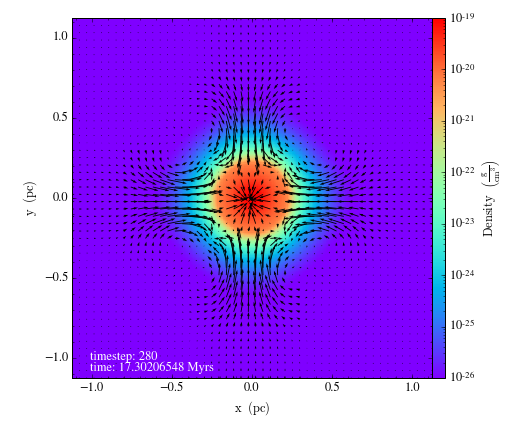


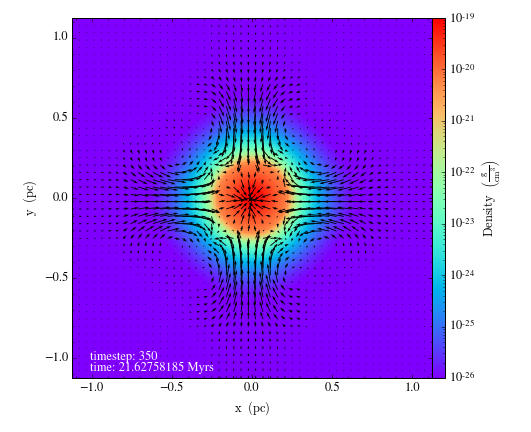


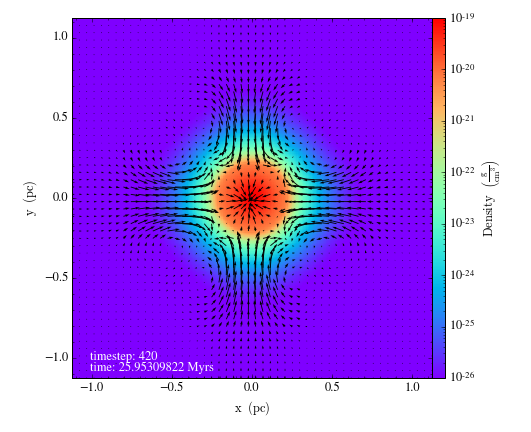

In [32]:
for i in np.arange(1,471):
    if i%70==0:
        plot_is.plot_time_slice("density",i,plot_size=5,zmin=1e-26,zmax=1e-19)